# Heart Attack reasons and predictionMulti-class classifier 


---
References


---



[Dataset](https://www.kaggle.com/code/caesarmario/heart-disease-eda-prediction/notebook#2.-|-Importing-Libraries-%F0%9F%93%9A)

[Refered Notebook](https://www.kaggle.com/code/asimislam/heart-attack-eda-corr-ml-ml-metrics#Heart-Attack:-EDA-+-CORR-+-ML-+-ML-metrics)

[Refered Notebook 2](https://www.kaggle.com/code/caesarmario/heart-disease-eda-prediction/notebook)

 [classification](https://www.section.io/engineering-education/multiclass-text-classification-with-pyspark/)

---


## **Setting up Spark Environment **


---


1. Install Java
1. Install Spark
1. Install findSpark 
1. Setting the env
1. Initialising findspark
1. Create Spark session


---


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark

## Mounting the google drive and Loading the file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Details of the data 

In [ ]:
sdf = spark.read.csv("drive/My Drive/bbc-project/classificationdata/heart.csv",header=True,inferSchema=True)
sdf.show()

+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
|age|sex| cp|trestbps|chol|fbs|restecg|thalach|exang|oldpeak|slope| ca|thal|target|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
| 63|  1|  3|     145| 233|  1|      0|    150|    0|    2.3|    0|  0|   1|     1|
| 37|  1|  2|     130| 250|  0|      1|    187|    0|    3.5|    0|  0|   2|     1|
| 41|  0|  1|     130| 204|  0|      0|    172|    0|    1.4|    2|  0|   2|     1|
| 56|  1|  1|     120| 236|  0|      1|    178|    0|    0.8|    2|  0|   2|     1|
| 57|  0|  0|     120| 354|  0|      1|    163|    1|    0.6|    2|  0|   2|     1|
| 57|  1|  0|     140| 192|  0|      1|    148|    0|    0.4|    1|  0|   1|     1|
| 56|  0|  1|     140| 294|  0|      0|    153|    0|    1.3|    1|  0|   2|     1|
| 44|  1|  1|     120| 263|  0|      1|    173|    0|    0.0|    2|  0|   3|     1|
| 52|  1|  2|     172| 199|  1|      1|    162|    0|    0.5|    2|  0|   3|

###  Column description


| Original Name   |  Description |
| :--  | :--- |
|**age**|age of patient
|**sex**|sex of patient:  0: female, 1: male
|**cp**|chest pain type: 0: typical angina, 1: atypical angina, 2: non-anginal, 3: asymptomatic |
|**trestbps**|resting blood pressure |
|**chol**|serum cholestoral in mg/dl |
|**fbs**|fasting blood sugar: 0: > 120 mg/dl, 1: < 120 mg/dl |
|**restecg**|resting electrocardiographic results: 0: normal, 1: ST-T wave abnormality, 2: ventricular hypertrophy |
|**thalach**|maximum heart rate achieved |
|**exang**|exercise induced angina:  0: no, 1: yes |
|**oldpeak**| ST depression induced by exercise relative to rest |
|**slope**|slope of the peak exercise ST segment:  0: upsloping, 1: flat, 2: downsloping |
|**ca**|number of major vessels (0-3) colored by flourosopy |
|**thal**| Thalium stress test:  0: normal 0, 1:normal 1, 2: fixed defect, 3: reversable defect |
|**target** | heart disease: 0: no disease, 1: disease|

## Import required libraries 

In [ ]:
# --- Importing Libraries ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


# --- Libraries Settings ---
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi']=100
#set_palette('dark')

In [ ]:
# Convert to Pandas
df = sdf.toPandas()

In [ ]:
print(df.head())
print(df.shape)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
(303, 14)


In [ ]:
# --- Fix Data Types ---
lst=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df[lst] = df[lst].astype(object)

## Cleaning Data  & Feature Engineering

In [ ]:
#  check & drop for DUPLICATES
df.drop_duplicates(inplace = True)  #  drop duplitcates
print('2nd DUPLICATE count:\t{}'.format(df.duplicated().sum()))

2nd DUPLICATE count:	0


## Feature Engineering , Age and Sex distribution

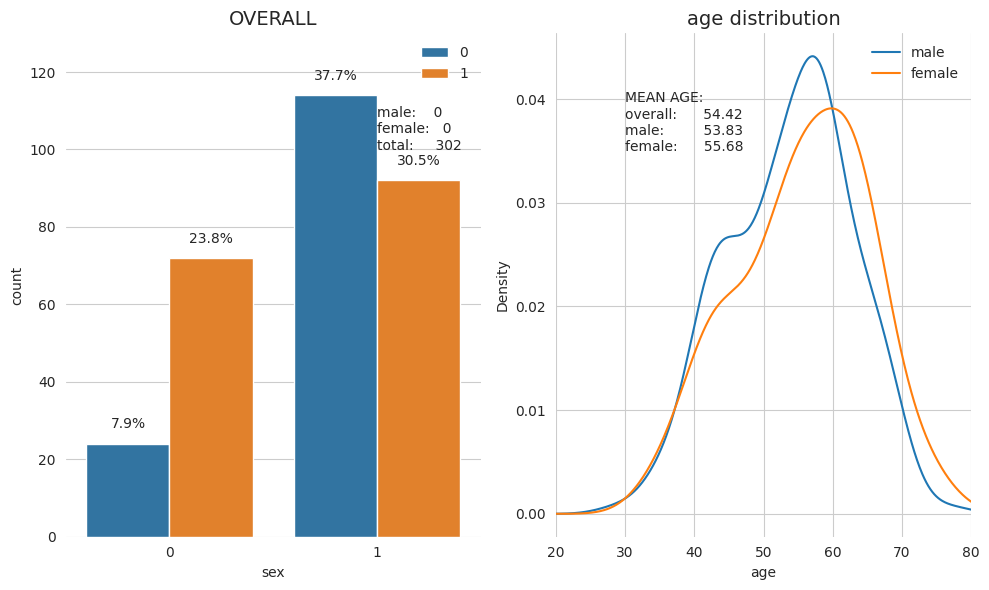

In [ ]:
# --- COUNT and DISTRIBUTION plots ---
countM = len(df['age'][df['sex'] == 'male'])    # count of "male"
countF = len(df['age'][df['sex'] == 'female'])  # count of "female"


fig = plt.figure(figsize=(10,6))

plt.subplot(121)   # overall
ax = sns.countplot(data = df, x = 'sex', hue = 'target')
plt.title('OVERALL', fontsize = 14)
plt.ylim([0,130])
plt.legend(loc='upper right', frameon=False)
plt.box(False)
for p in ax.patches:
    ax.annotate("{:,.1f}%".format(p.get_height()*100/len(df)), (p.get_x() + p.get_width()/2, p.get_height()+5), ha='center', va='center')
plt.text(1,100, 'male:    {}\nfemale:   {}\ntotal:     {}'.format(countM,countF,len(df)))

plt.subplot(122)   # age distribution
df['age'][df['sex'] == 1].plot(kind = 'kde')
df['age'][df['sex'] == 0].plot(kind = 'kde')
plt.title('age distribution', fontsize = 14)
plt.xlabel('age')
plt.legend(('male', 'female'), loc='upper right', frameon=False)
plt.xlim([20,80])
plt.box(False)
# mean age
avg_o = df['age'].mean()
avg_m = df['age'][df['sex'] == 1].mean()
avg_f = df['age'][df['sex'] == 0].mean()
plt.text(30,.035, 'MEAN AGE:\noverall: {:>10.2f}\nmale:    {:>10.2f}\nfemale: {:>10.2f}'.format(avg_o,avg_m,avg_f))

plt.tight_layout()
plt.show()

NUM data:  41	age
CAT data:  2	sex
CAT data:  4	cp
NUM data:  49	trestbps
NUM data:  152	chol
CAT data:  2	fbs
CAT data:  3	restecg
NUM data:  91	thalach
CAT data:  2	exang
NUM data:  40	oldpeak
CAT data:  3	slope
CAT data:  5	ca
CAT data:  4	thal
CAT data:  2	target


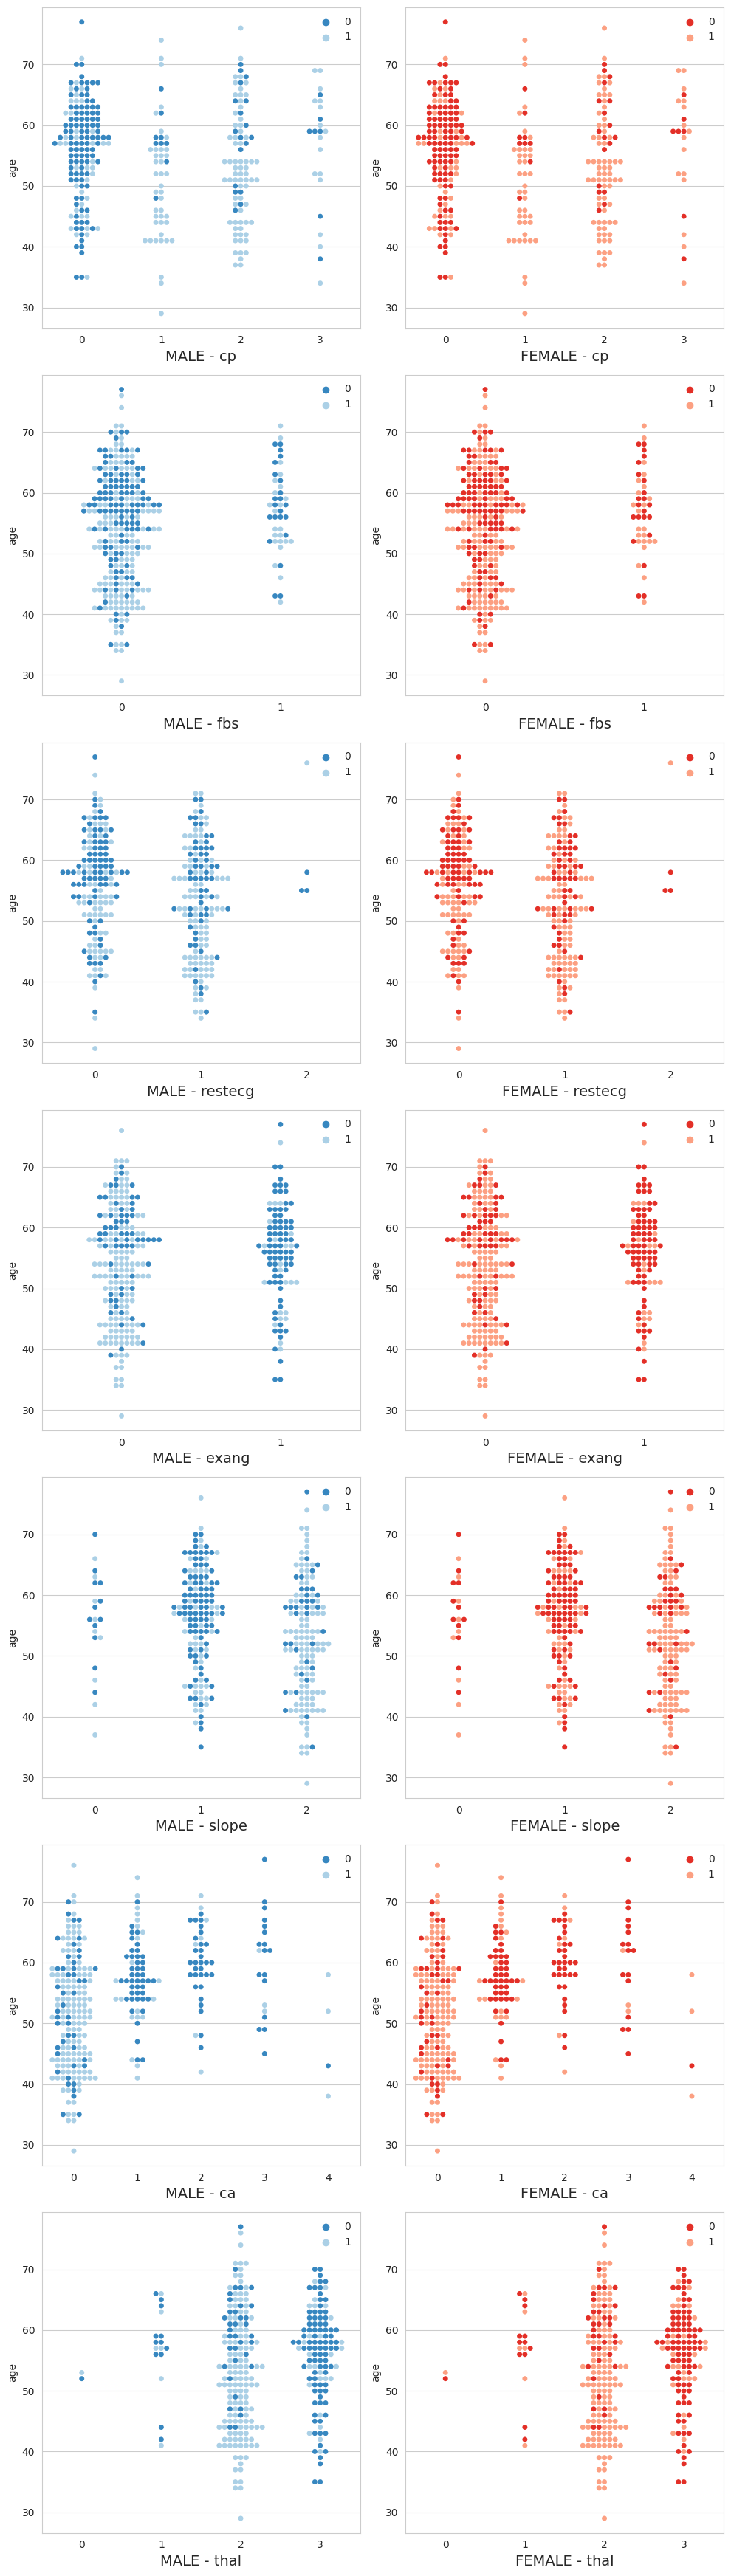

In [ ]:
#  Separate out Categorical and Numeric data
colCAT = []
colNUM = []
for i in df.columns:
    if (len(df[i].unique())) > 5:
        colNUM.append(i)
        print('NUM data:  {}\t{}'.format(len(df[i].unique()),i))
    else:
        colCAT.append(i)
        print('CAT data:  {}\t{}'.format(len(df[i].unique()),i))

# --- CAT MALE/FEMALE swarmplots ---
a = len(df[colCAT].columns.drop(['sex','target']))
       # number of rows (CAT columns minus sex & output)
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(10,a*5))

for i in df[colCAT].columns.drop(['sex','target']):
    #  swarmplot - MALE
    fig.add_subplot(a,b,c)
    sns.swarmplot(data = df[df['sex'] == 'male'], x = df[i], y = df.age, hue = df.target, palette = 'Blues_r')
    plt.xlabel('MALE - {}'.format(i), fontsize = 14)
    plt.legend(loc='upper right', frameon=False)
    c = c + 1
    
    #  swarmplot - FEMALE
    fig.add_subplot(a,b,c)
    sns.swarmplot(data = df[df['sex'] == 'female'], x = df[i], y = df.age, hue = df.target, palette = 'Reds_r')
    plt.xlabel('FEMALE - {}'.format(i), fontsize = 14)
    plt.legend(loc='upper right', frameon=False)
    c = c + 1

plt.tight_layout()
plt.show()

In [ ]:
# Machine Learning Evaluation for Classification Models
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


# create and initialize lists for dataframe
list_name, list_model = ([] for i in range(2))
list_CM, list_TN, list_FP, list_FN, list_TP = ([] for i in range(5))
list_AC, list_RC, list_PS, list_F1 = ([] for i in range(4))
list_CVS, list_AUC = ([] for i in range(2))

In [ ]:
# Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


models = []   #  list with models
models.append(('RF  ', RandomForestClassifier()))


models.sort()
for i in models:
    print(i)

('RF  ', RandomForestClassifier())


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['target'], axis = 1)
y = df['target']

split = 0.20  # 20% split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = split)
print ('Train set:  ', X_train.shape,  y_train.shape)
print ('Test set:   ', X_test.shape,  y_test.shape)

Train set:   (241, 13) (241,)
Test set:    (61, 13) (61,)


In [ ]:
#  Evaluate the Models:
for name, model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    list_name.append(name)    # model names
    list_model.append(str(model).split("(")[0])
    
    # confusion matrix values
    CM = confusion_matrix(y_test, y_pred)
    TN = CM[0][0]  # True Negative  (Top-Left Quadrant)
    FP = CM[0][1]  # False Positive (Top-Right Quadrant)
    FN = CM[1][0]  # False Negative (Bottom-Left Quadrant)
    TP = CM[1][1]  # True Positive  (Bottom-Right Quadrant)
    
    list_CM.append(CM)  # confusion_matrix
    list_TN.append(TN)  # True Negative  (Top-Left Quadrant)
    list_FP.append(FP)  # False Positive (Top-Right Quadrant)
    list_FN.append(FN)  # False Negative (Bottom-Left Quadrant)
    list_TP.append(TP)  # True Positive  (Bottom-Right Quadrant)
    
    list_AC.append(accuracy_score(y_test, y_pred))    # accuracy_score
    list_RC.append(recall_score(y_test, y_pred))      # recall
    list_PS.append(precision_score(y_test, y_pred))   # precision
    list_F1.append(f1_score(y_test, y_pred))          # F1 score
    list_CVS.append(cross_val_score(model, X_train, y_train, cv = 5, scoring = 'accuracy').mean())  # cross-validation score

    #  area under curve
    model.probability = True   # need for predict_proba to work
    model.fit(X_train,y_train)
    y_preda = model.predict_proba(X_test)
    y_preda = y_preda[:,1]   # positive values only
    list_AUC.append(roc_auc_score(y_test, y_preda))
    
    print('evalute metrics for:\t', name)

evalute metrics for:	 RF  


In [ ]:
#  fill out the model dataframe
df_metrics = pd.DataFrame()

df_metrics['name'] = list_name
df_metrics['model'] = list_model

df_metrics['ConfusionMatrix'] = list_CM
df_metrics['TN'] = list_TN
df_metrics['FP'] = list_FP
df_metrics['FN'] = list_FN
df_metrics['TP'] = list_TP

df_metrics['AccuracyScore'] = list_AC
df_metrics['Recall'] = list_RC
df_metrics['Precision'] = list_PS
df_metrics['F1Score'] = list_F1

df_metrics['AUC'] = list_AUC
df_metrics['CrossValidation'] = list_CVS

print(df_metrics)
print(df_metrics.columns)

   name                   model      ConfusionMatrix  TN  FP  FN  TP  \
0  RF    RandomForestClassifier  [[21, 10], [2, 28]]  21  10   2  28   

   AccuracyScore    Recall  Precision   F1Score       AUC  CrossValidation  
0       0.803279  0.933333   0.736842  0.823529  0.896774          0.77602  
Index(['name', 'model', 'ConfusionMatrix', 'TN', 'FP', 'FN', 'TP',
       'AccuracyScore', 'Recall', 'Precision', 'F1Score', 'AUC',
       'CrossValidation'],
      dtype='object')


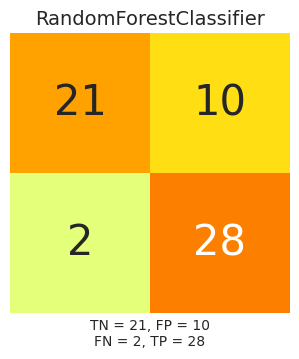

In [ ]:
#  plot Confusion Matrix
a = 2  # subplot rows
b = 3  # subplot columns
c = 1  # subplot counter
fig = plt.figure(figsize=(9,8))

for i in range(len(df_metrics)):
    #  get values from dataframe
    mod_name  = df_metrics['model'].loc[i]
    conf_matx = df_metrics['ConfusionMatrix'].loc[i]

    # confusion matrix values
    TN = df_metrics['TN'].loc[i]  # True Negative (Top-Left Quadrant)
    FP = df_metrics['FP'].loc[i]  # False Positive (Top-Right Quadrant)
    FN = df_metrics['FN'].loc[i]  # False Negative (Bottom-Left Quadrant)
    TP = df_metrics['TP'].loc[i]  # True Positive (Bottom-Right Quadrant)
    
    # plot confusion matrix in dataframe
    plt.subplot(a, b, c)
    sns.heatmap(conf_matx, annot=True, cbar = False, annot_kws={"size": 30}, cmap = 'Wistia', square = True)
    plt.title(mod_name, fontsize = 14)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('TN = {}, FP = {}\nFN = {}, TP = {}'.format(TN,FP,FN,TP))
    c = c + 1

plt.tight_layout()
plt.show()

********************************
.: Fasting Blood Sugar Total :.
********************************


0    257
1     45
Name: fbs, dtype: int64

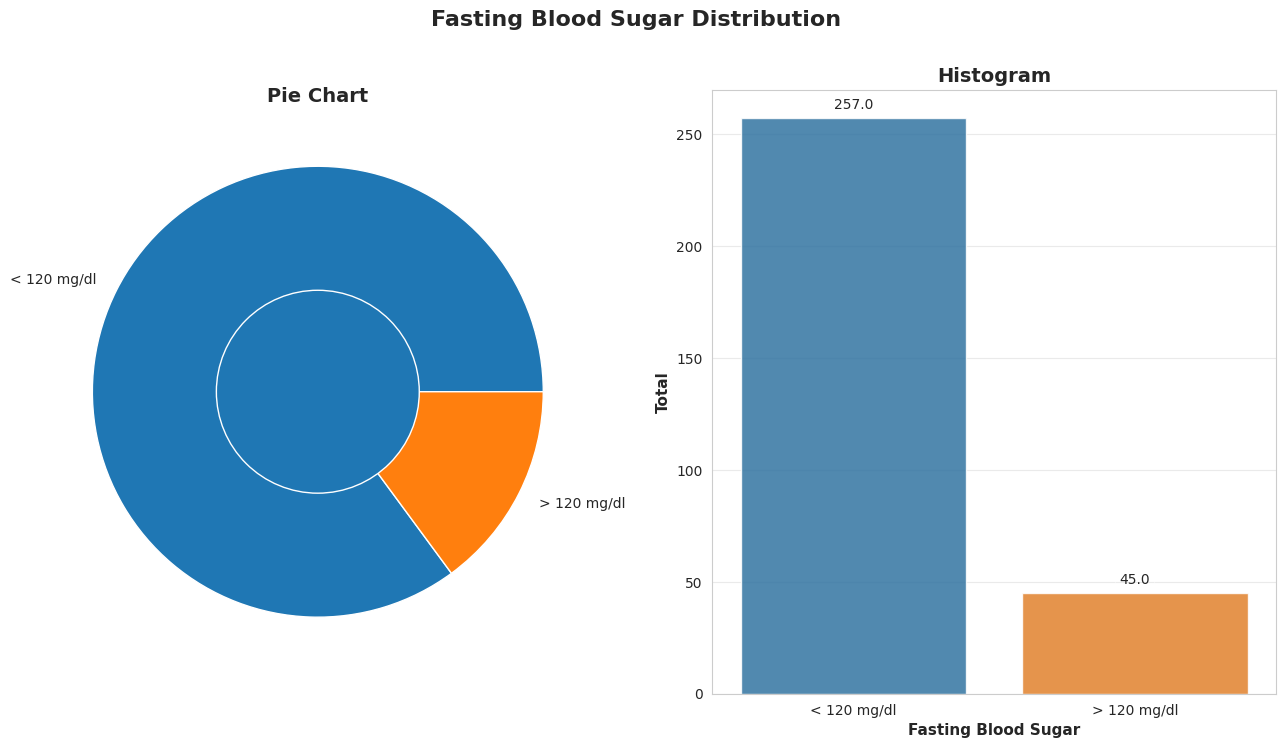

In [ ]:
# fbs (Fasting Blood Sugar)
# --- Setting Colors, Labels, Order ---
labels=['< 120 mg/dl', '> 120 mg/dl']
order=df['fbs'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Fasting Blood Sugar Distribution', fontweight='heavy',
             fontsize=16, fontfamily='sans-serif')

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.pie(df['fbs'].value_counts(), labels=labels)
centre=plt.Circle((0, 0), 0.45)
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax = sns.countplot(x='fbs', data=df,  order=order, alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2,
             rect.get_height()+4.25,rect.get_height(),
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Fasting Blood Sugar', fontweight='bold', fontsize=11,
           fontfamily='sans-serif')
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 32)
print('\033[1m'+'.: Fasting Blood Sugar Total :.'+'\033[0m')
print('*' * 32)
df.fbs.value_counts(dropna=False)

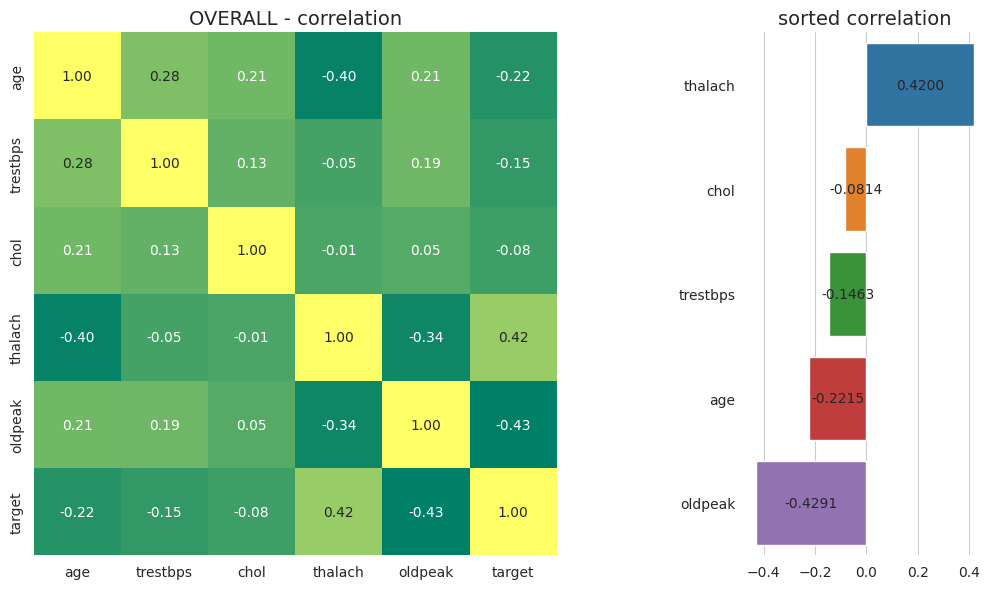

In [ ]:
# CORRELATION
dataCorr = df.corr()

#  Correlation TABLE
corrALL = dataCorr['target'].sort_values(ascending=False)
corrALL = corrALL.drop(['target'])


#  plot correlation heatmap and barchart
from matplotlib import gridspec

fig = plt.figure(figsize=(12,6)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1]) 

ax0 = plt.subplot(gs[0])
sns.heatmap(dataCorr, annot = True, fmt='.2f', square = True, cbar = False, ax = ax0, cmap ='summer')
plt.title('OVERALL - correlation', fontsize=14)

ax1 = plt.subplot(gs[1])
sns.barplot(y = corrALL.index, x = corrALL.values, ax = ax1)
plt.title('sorted correlation', fontsize = 14)
for p in ax1.patches:
    ax1.annotate("%.4f" % p.get_width(), (p.get_x() + p.get_width()/2, p.get_y()+.4), ha='center', va='center')
plt.box(False)

plt.tight_layout()
plt.show()

******************************
.: Chest Pain Type Total :.
******************************


0    143
2     86
1     50
3     23
Name: cp, dtype: int64

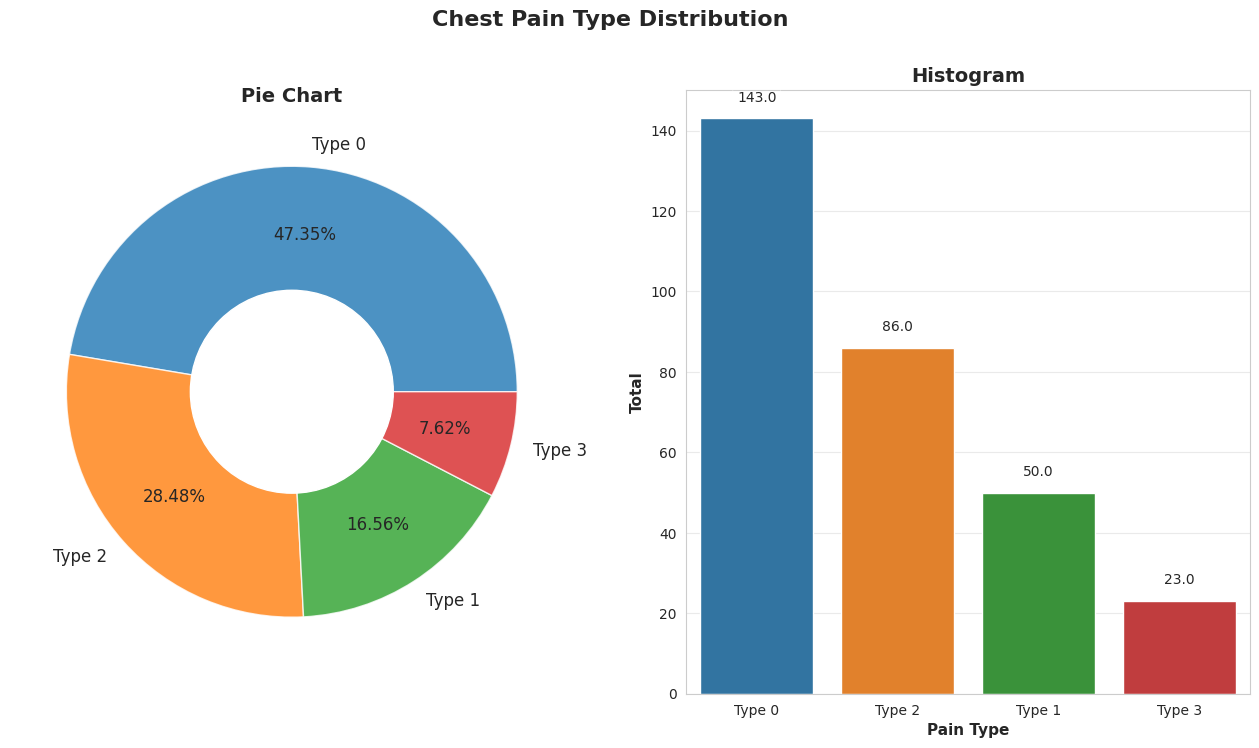

In [ ]:
# --- Setting Colors, Labels, Order ---
labels=['Type 0', 'Type 2', 'Type 1', 'Type 3']
order=df['cp'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Chest Pain Type Distribution', fontweight='heavy', fontsize=16,fontfamily='sans-serif')

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,fontfamily='sans-serif')
plt.pie(df['cp'].value_counts(), labels=labels, pctdistance=0.7,autopct='%.2f%%', textprops={'fontsize':12},wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax = sns.countplot(x='cp', data=df,order=order)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2,
             rect.get_height()+4.25,rect.get_height(),
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none',  linewidth=0.25,boxstyle='round'))

plt.xlabel('Pain Type', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.xticks([0, 1, 2, 3], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 30)
print('\033[1m'+'.: Chest Pain Type Total :.'+'\033[0m')
print('*' * 30)
df.cp.value_counts(dropna=False)

In [ ]:
#  fill out the model dataframe
# Machine Learning Evaluation for Classification Models
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


# create and initialize lists for dataframe
list_name, list_model = ([] for i in range(2))
list_CM, list_TN, list_FP, list_FN, list_TP = ([] for i in range(5))
list_AC, list_RC, list_PS, list_F1 = ([] for i in range(4))
list_CVS, list_AUC = ([] for i in range(2))
df_metrics = pd.DataFrame()

In [ ]:
# Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


models = []   #  list with models

models.append(('RF  ', RandomForestClassifier()))

models.sort()
for i in models:
    print(i)

('RF  ', RandomForestClassifier())


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['target'], axis = 1)
y = df['target']

split = 0.20  # 20% split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = split)
print ('Train set:  ', X_train.shape,  y_train.shape)
print ('Test set:   ', X_test.shape,  y_test.shape)


#  Evaluate the Models:
for name, model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    list_name.append(name)    # model names
    list_model.append(str(model).split("(")[0])
    
    # confusion matrix values
    CM = confusion_matrix(y_test, y_pred)
    TN = CM[0][0]  # True Negative  (Top-Left Quadrant)
    FP = CM[0][1]  # False Positive (Top-Right Quadrant)
    FN = CM[1][0]  # False Negative (Bottom-Left Quadrant)
    TP = CM[1][1]  # True Positive  (Bottom-Right Quadrant)
    
    list_CM.append(CM)  # confusion_matrix
    list_TN.append(TN)  # True Negative  (Top-Left Quadrant)
    list_FP.append(FP)  # False Positive (Top-Right Quadrant)
    list_FN.append(FN)  # False Negative (Bottom-Left Quadrant)
    list_TP.append(TP)  # True Positive  (Bottom-Right Quadrant)
    
    list_AC.append(accuracy_score(y_test, y_pred))    # accuracy_score
    list_RC.append(recall_score(y_test, y_pred))      # recall
    list_PS.append(precision_score(y_test, y_pred))   # precision
    list_F1.append(f1_score(y_test, y_pred))          # F1 score
    list_CVS.append(cross_val_score(model, X_train, y_train, cv = 5, scoring = 'accuracy').mean())  # cross-validation score

    #  area under curve
    model.probability = True   # need for predict_proba to work
    model.fit(X_train,y_train)
    y_preda = model.predict_proba(X_test)
    y_preda = y_preda[:,1]   # positive values only
    list_AUC.append(roc_auc_score(y_test, y_preda))
    
    print('evalute metrics for:\t', name)

Train set:   (241, 13) (241,)
Test set:    (61, 13) (61,)
evalute metrics for:	 RF  


In [ ]:
#  fill out the model dataframe
df_metrics = pd.DataFrame()

df_metrics['name'] = list_name
df_metrics['model'] = list_model

df_metrics['ConfusionMatrix'] = list_CM
df_metrics['TN'] = list_TN
df_metrics['FP'] = list_FP
df_metrics['FN'] = list_FN
df_metrics['TP'] = list_TP

df_metrics['AccuracyScore'] = list_AC
df_metrics['Recall'] = list_RC
df_metrics['Precision'] = list_PS
df_metrics['F1Score'] = list_F1

df_metrics['AUC'] = list_AUC
df_metrics['CrossValidation'] = list_CVS

print(df_metrics)
print(df_metrics.columns)

   name                   model     ConfusionMatrix  TN  FP  FN  TP  \
0  RF    RandomForestClassifier  [[22, 7], [4, 28]]  22   7   4  28   

   AccuracyScore  Recall  Precision   F1Score       AUC  CrossValidation  
0       0.819672   0.875        0.8  0.835821  0.878772          0.80085  
Index(['name', 'model', 'ConfusionMatrix', 'TN', 'FP', 'FN', 'TP',
       'AccuracyScore', 'Recall', 'Precision', 'F1Score', 'AUC',
       'CrossValidation'],
      dtype='object')


In [ ]:
# --- Descriptive Statistics ---
df.select_dtypes(exclude='object').describe()


,age,trestbps,chol,thalach,oldpeak,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046,0.543046
std,9.04797,17.563394,51.753489,22.903527,1.161452,0.498970
min,29.00000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000,1.000000
75%,61.00000,140.000000,274.750000,166.000000,1.600000,1.000000
max,77.00000,200.000000,564.000000,202.000000,6.200000,1.000000


.: Age Column Skewness & Kurtosis :.
****************************************
Skewness: -0.204
Kurtosis: -0.528




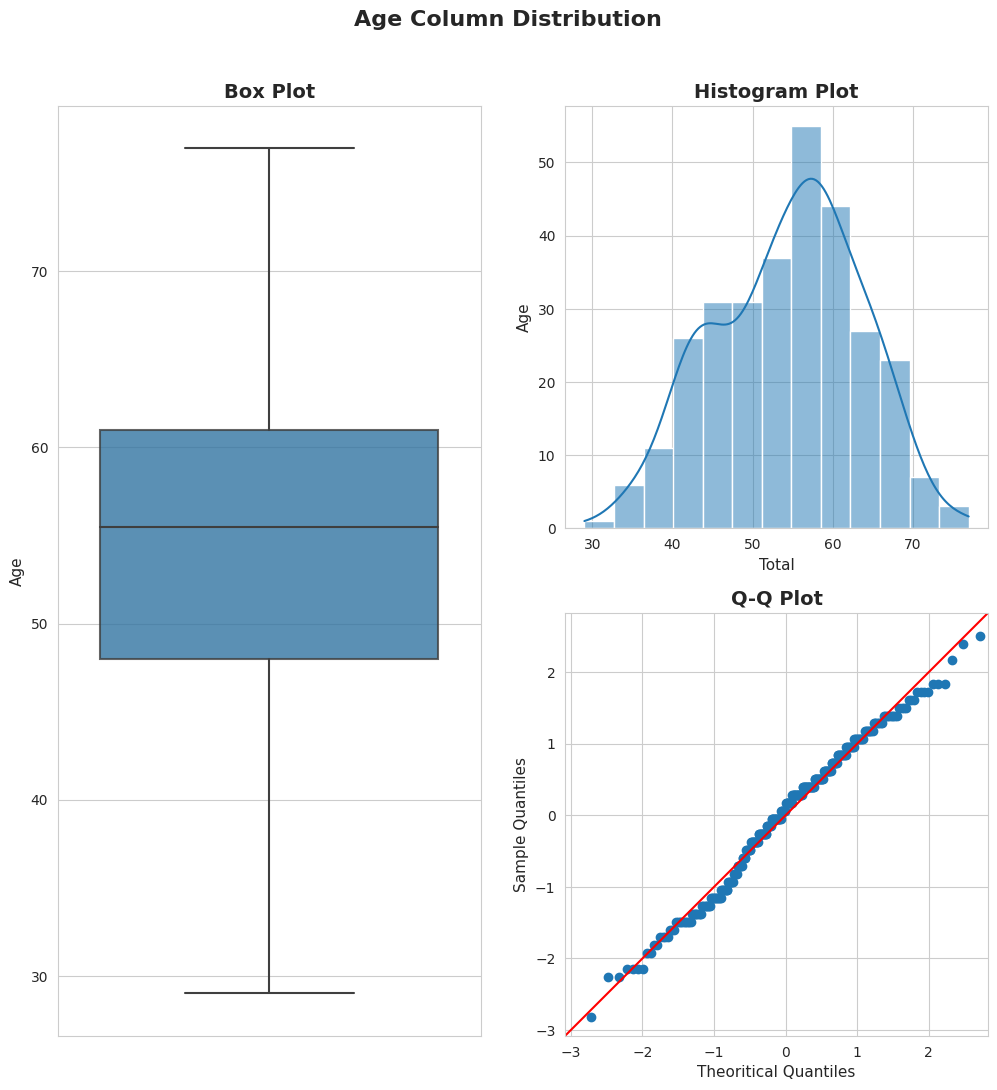

In [ ]:
# --- Variable, Color & Plot Size ---
from statsmodels.graphics.gofplots import qqplot
var = 'age'
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Age Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Age Column Distribution', fontweight='bold', fontsize=16,
             fontfamily='sans-serif')
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14,
          fontfamily='sans-serif')
sns.histplot(data=df, x=var, kde=True)
plt.xlabel('Total', fontweight='regular', fontsize=11,
           fontfamily='sans-serif')
plt.ylabel('Age', fontweight='regular', fontsize=11, fontfamily='sans-serif')

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14,
          fontfamily='sans-serif')
qqplot(df[var], fit=True, line='45', ax=ax_2)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11,
           fontfamily='sans-serif')
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11,
           fontfamily='sans-serif')

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif')
sns.boxplot(data=df, y=var, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Age', fontweight='regular', fontsize=11, fontfamily='sans-serif')

plt.show()

In [ ]:
# --- Seperating Dependent Features ---
from sklearn.preprocessing import MinMaxScaler
x = df.drop(['target'], axis=1)
y = df['target']

# --- Data Normalization using Min-Max Method ---
x = MinMaxScaler().fit_transform(x)
# --- Applying Random Forest ---
# --- Splitting Dataset into 80:20 ---
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

RFclassifier = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=20, min_samples_split=15)

RFclassifier.fit(x_train, y_train)
y_pred_RF = RFclassifier.predict(x_test)

.:. Random Forest Accuracy: 88.52% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

           0       1.00      0.74      0.85        27
           1       0.83      1.00      0.91        34

    accuracy                           0.89        61
   macro avg       0.91      0.87      0.88        61
weighted avg       0.90      0.89      0.88        61


.: Performance Evaluation
**************************


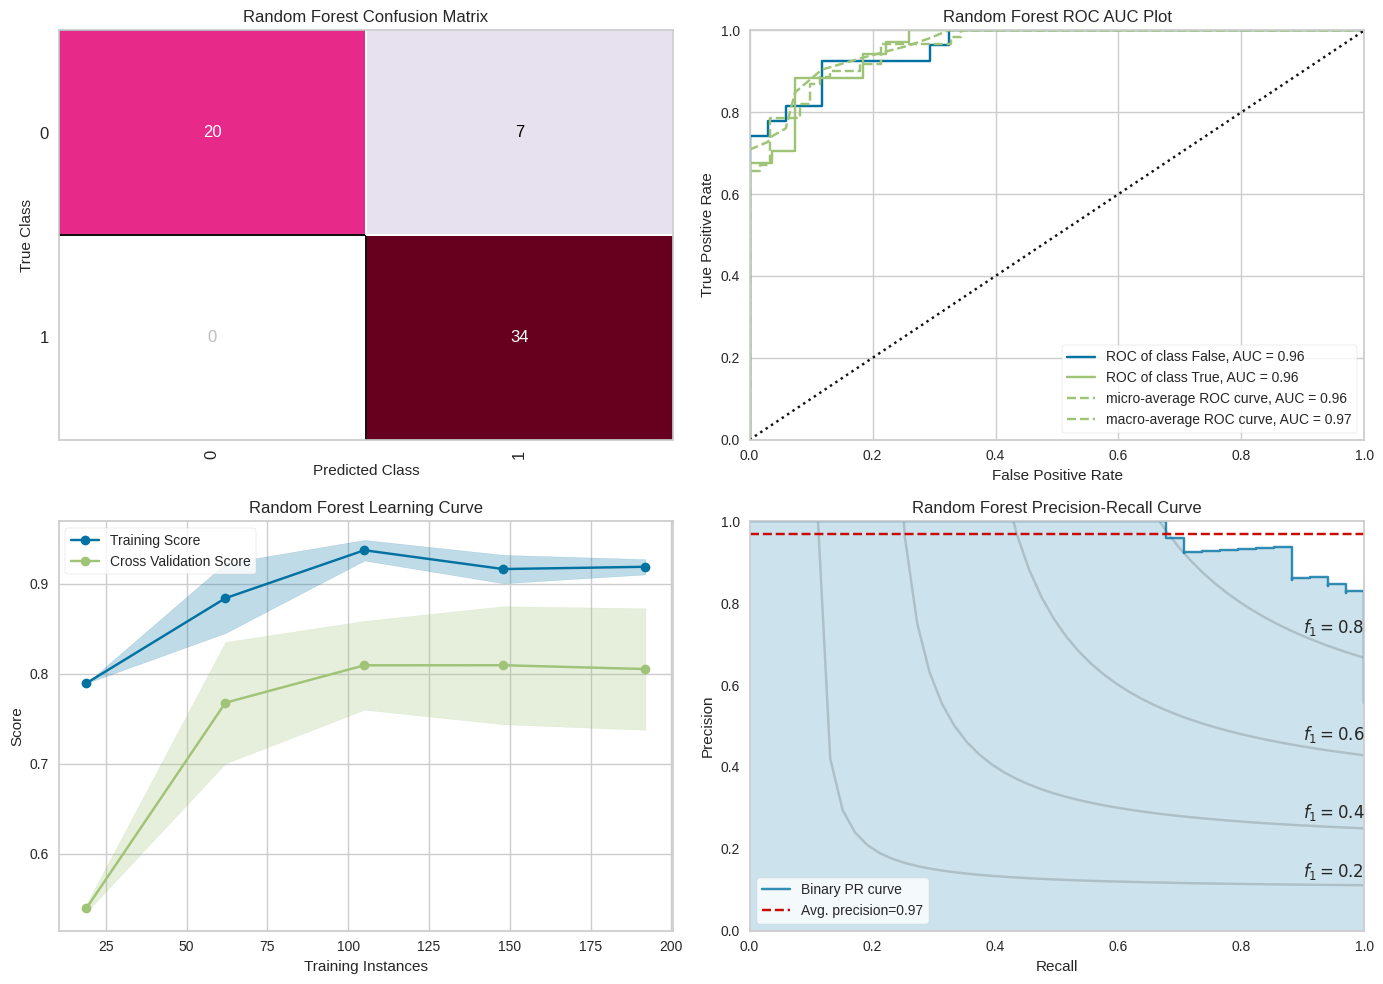

In [ ]:
# --- Random Forest Accuracy ---
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.model_selection import LearningCurve, FeatureImportances
RFAcc = accuracy_score(y_pred_RF, y_test)
print('.:. Random Forest Accuracy:'+'\033[1m {:.2f}%'.format(RFAcc*100)+' .:.')

# --- Random FOrest Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test, y_pred_RF))

# --- Performance Evaluation ---
print('\n\033[1m'+'.: Performance Evaluation'+'\033[0m')
print('*' * 26)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# --- Random Forest Confusion Matrix ---
rfcmatrix = ConfusionMatrix(RFclassifier, ax=ax1, cmap='PuRd',
                            title='Random Forest Confusion Matrix')
rfcmatrix.fit(x_train, y_train)
rfcmatrix.score(x_test, y_test)
rfcmatrix.finalize()

# --- Random Forest ROC AUC ---
rccrocauc = ROCAUC(RFclassifier, classes=['False', 'True'], ax=ax2,
                   title='Random Forest ROC AUC Plot')
rccrocauc.fit(x_train, y_train)
rccrocauc.score(x_test, y_test)
rccrocauc.finalize()

# --- Random Forest Learning Curve ---
rcclc = LearningCurve(RFclassifier, ax=ax3, title='Random Forest Learning Curve')
rcclc.fit(x_train, y_train)
rcclc.finalize()

# --- Random Forest Precision Recall Curve ---
rcccurve = PrecisionRecallCurve(RFclassifier, ax=ax4, ap_score=True, iso_f1_curves=True,
                                title='Random Forest Precision-Recall Curve')
rcccurve.fit(x_train, y_train)
rcccurve.score(x_test, y_test)
rcccurve.finalize()

plt.tight_layout();

In [ ]:
# --- Create Accuracy Comparison Table ---
compare = pd.DataFrame({'Model': [ 'Random Forest'],
                        'Accuracy': [RFAcc*100]})

# --- Create Accuracy Comparison Table ---
compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='PuRd').hide_index().set_properties(**{'font-family': 'Segoe UI'})

Model,Accuracy
Random Forest,88.524590
